Path 1: 11 steps


TypeError: Image data of dtype <U5 cannot be converted to float

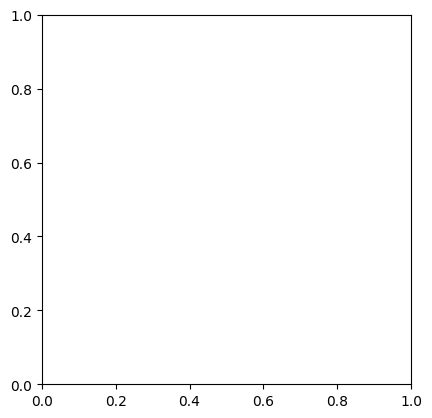

In [1]:
import heapq
import numpy as np
import matplotlib.pyplot as plt

GRID_SIZE = 10

# Terrain costs
TERRAIN_COSTS = {
    0: 1,   # Normal ground
    1: 2,   # Sand (higher cost)
    2: 5,   # Forest (much higher cost)
    3: np.inf  # Wall (impassable)
}

DIRECTIONS = [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]

def generate_grid(size, obstacle_prob=0.2):
    grid = np.random.choice([0, 1, 2, 3], size=(size, size), p=[0.7, 0.15, 0.1, 0.05])
    grid[0, 0] = 0  
    grid[size - 1, size - 1] = 0  
    return grid

def get_neighbors(current, size):
    neighbors = []
    for dx, dy in DIRECTIONS:
        neighbor = (current[0] + dx, current[1] + dy)
        if 0 <= neighbor[0] < size and 0 <= neighbor[1] < size:
            neighbors.append(neighbor)
    return neighbors

def heuristic(a, b):
    return ((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2) ** 0.5 

def a_star_multiple_paths(grid, start, goal, max_paths=3):
    pq = []
    heapq.heappush(pq, (0, start, []))
    paths = []
    visited = set()

    while pq and len(paths) < max_paths:
        _, current, path = heapq.heappop(pq)

        if current in visited:
            continue
        visited.add(current)

        new_path = path + [current]

        if current == goal:
            paths.append(new_path)
            continue  

        for neighbor in get_neighbors(current, len(grid)):
            if grid[neighbor] == 3:
                continue
            cost = TERRAIN_COSTS[grid[neighbor]]
            heapq.heappush(pq, (len(new_path) + cost + heuristic(neighbor, goal), neighbor, new_path))

    return paths if paths else None  

def visualize(grid, paths):
    cmap = {0: "white", 1: "tan", 2: "green", 3: "black"}
    grid_colors = [[cmap[grid[x, y]] for y in range(GRID_SIZE)] for x in range(GRID_SIZE)]

    fig, ax = plt.subplots()
    ax.imshow(grid_colors, aspect="equal")

    colors = ["red", "blue", "purple"]  
    for i, path in enumerate(paths):
        x, y = zip(*path)
        ax.plot(y, x, marker="o", color=colors[i % len(colors)], markersize=5, linewidth=2, label=f"Path {i+1}")

    plt.xticks([])
    plt.yticks([])
    plt.legend()
    plt.title("A* Pathfinding with Multiple Paths")
    plt.show()

grid = generate_grid(GRID_SIZE)
start, goal = (0, 0), (GRID_SIZE - 1, GRID_SIZE - 1)
paths = a_star_multiple_paths(grid, start, goal)

if paths:
    for i, path in enumerate(paths):
        print(f"Path {i+1}: {len(path)} steps")
else:
    print("No path found.")

visualize(grid, paths)
